In [5]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1]:
import sys
print(sys.version)

3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]


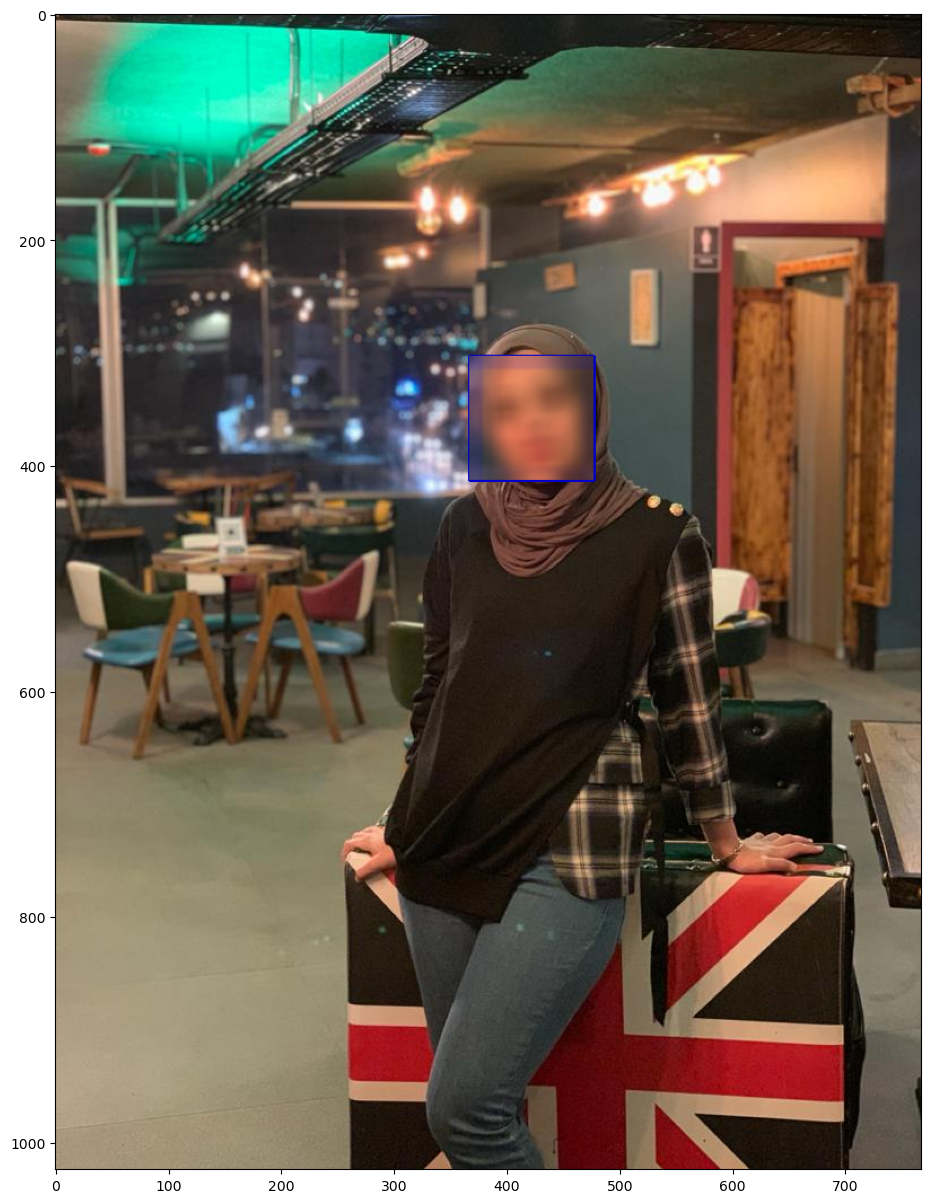

In [50]:
## passing the haarcascade_frontalface_default.xml file into cascade classifier  
face_model = cv2.CascadeClassifier('../input/haarcascade/haarcascade_frontalface_default.xml')

## Choosing the image from the directory
img = cv2.imread("../input/shathaimage/shatha.jpg") #you can choose what ever image you want

## Converting the image to grayscale to apply haarcascade algorithm
"""haarcascade algorithm is an algorithm that can detect objects in images, 
irrespective of their scale in image and location"""

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

## Returns the x, y, w, h co-ordinates as numpy arrays for  the detected face
detected_face = face_model.detectMultiScale(img)

## Converting from grayscale to colored image
output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

## Drawing rectangle box around the faces in the image
for (x, y, w, h) in detected_face:
    cv2.rectangle(output_img, (x,y), (x+w, y+h), (0, 0, 200), 2)
    roi = output_img[y:y+h, x:x+w]
    # applying a gaussian blur function over the new face area
    roi = cv2.GaussianBlur(roi, (23, 23), 30)
    # impose this blurred image on original image to get final image
    output_img[y:y+roi.shape[0], x:x+roi.shape[1]] = roi
    
## Displaying the image
plt.figure(figsize = (15, 15))
plt.imshow(output_img)